<a href="https://colab.research.google.com/github/sordib/exercicios_bootcamp_womakerscode/blob/main/challenge_semana4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Teste de Correlação e Regressão**

###Integrantes do Squad Grace Hopper:


*   Aline Alvino
*   Bianca Sordi
*   Maitê S. Cuevas
*   Marina Arthur
*   Marina Neves
*   Mayara Reghin
*   Victória Viana
*   Wellen Nascimento


---

###Organização da Squad



*  Nos reunimos para discutir sobre o desafio

*  Compartilhamos o colab para deixar livre para todas colaborarem com o desafio

*  Nos reunimos após o desafio estar pronto para conversar sobre o que fizemos, revisar e ajustar

*  As integrantes Aline, Bianca, Maitê e Mayara ficaram responsáveis pela apresentação

---
###Facilidades e dificuldades encontradas no desenvolvimento do desafio

**Facilidades:**

* Mais tempo para estudar sobre o conteúdo e desenvolver o desafio

* Melhor organização e comunicação na squad



**Dificuldades:**

* Base de dados mais complexa



### **Importando bibliotecas e bases de dados**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('desafio_01_preco_imoveis230209164627-230918-093224.csv')

### **Conhecendo o dataset**

In [ ]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [ ]:
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
dtype: object

Análise das variáveis:

> Qualitativas (Categóricas)

 -> *Nominais*

* id
* waterfront
* zipcode
* lat
* long

-> *Ordinais*

* date
* condition

> Quantitativas (Numéricas)

-> *Discretas*

* grade
* sqft_above
* sqft_basement
* yr_built
* yr_renovated
* view
* bedrooms
* bathrooms
* sqft_living
* sqft_lot
* floors

-> *Continuas*

* price

# **Desafio: Analise de Correlação**

Suponha que você trabalha em uma empresa do setor imobiliário. Para essa empresa é
muito importante precificar corretamente o imóvel, caso contrário, os corretores
podem perder a venda. Como parte do time de dados, você é responsável por analisar
os principais fatores que podem afetar o preço dos imóveis. Para isso, eles te enviaram
a base de dados (desafio_01_preco_imoveis.csv). Como você poderia ajudá-los?


## 1 - Analise a correlação de todas as variáveis com o preço do imóvel. Quais variáveis são mais correlacionadas? Quais são menos correlacionadas?


In [ ]:
# aqui podemos ver todas correlacoes com o preco
correlacao = dataset.corr()
correlacao_preco = correlacao['price'].sort_values(q=False)
correlacao_preco

<ipython-input-52-307a14335154>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dataset.corr()


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [ ]:
# Lista das variáveis são numéricas
variaveis_selecionadas = ['grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                          'view', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','price']

# Adicionando essas colunas selecionadas a uma variavel
dataset_selecionado = dataset[variaveis_selecionadas]

# Calculando a correlação com a coluna 'price'
correlacao = dataset_selecionado.corr()
correlacao_preco = correlacao['price'].sort_values(ascending=False)
correlacao_preco

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
Name: price, dtype: float64

Conclusões: É possível verificar que as as variáveis com correlação mais próximo de 1 possuem uma correlação mais forte e positiva com relação ao preço, ou seja, o aumento do preço ocorre quando estas variáveis também aumentam.
Já no caso das correlações próximas a zero, há um indício de que não há relação entre estas variáveis.

In [ ]:
## as 5 variáveis mais correlacionadas com o preço do imóvel
correlacao_preco.iloc[1:].head(5)

sqft_living    0.702035
grade          0.667434
sqft_above     0.605567
bathrooms      0.525138
view           0.397293
Name: price, dtype: float64

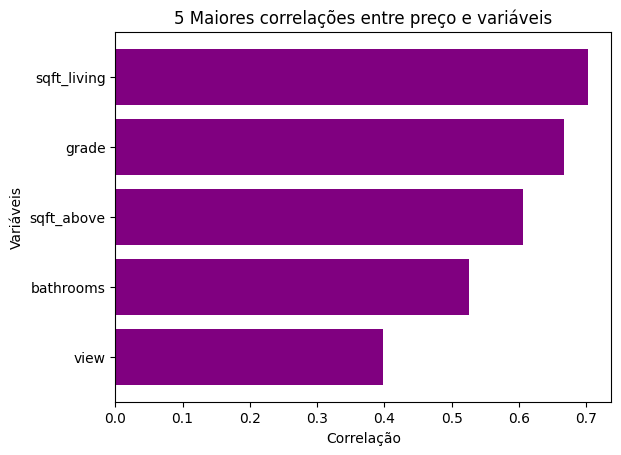

In [ ]:
#gráfico para observação das 5 maiores correlações:
#definindo o eixo Y
variaveis = ['view','bathrooms', 'sqft_above', 'grade','sqft_living']
#definindo o eixo X
correlacoes = [0.397293,0.525138, 0.605567, 0.667434, 0.702035]
#construindo o gráfico de barras
plt.barh (variaveis, correlacoes, color = "purple")
plt.ylabel("Variáveis")
plt.xlabel("Correlação")
plt.title("5 Maiores correlações entre preço e variáveis")
plt.show()

Conclusões: É possível verificar que as variáveis que mais se relacionam positivamente com o preço do imóvel são: tamanho do imóvel (dentro da casa)> nota do imóvel>tamanho da casa acima do solo (excluindo porão)>número de banheiros>número de quartos com vista

In [ ]:
## as 5 variáveis menos correlacionadas com o preço do imóvel

correlacao_preco.tail()

bedrooms        0.308350
floors          0.256794
yr_renovated    0.126434
sqft_lot        0.089661
yr_built        0.054012
Name: price, dtype: float64

Conclusões: É possível verificar que as variáveis que possuem uma relação fraca ou quase inexistente se aproximando do zero são: número de quartos, número de andares, ano de renovação, tamanho do terreno e ano de construção.

## 2 - Para as top 5 variáveis mais correlacionadas com o preço:

###2.1 plote as suas distribuições (histograma e boxplot)

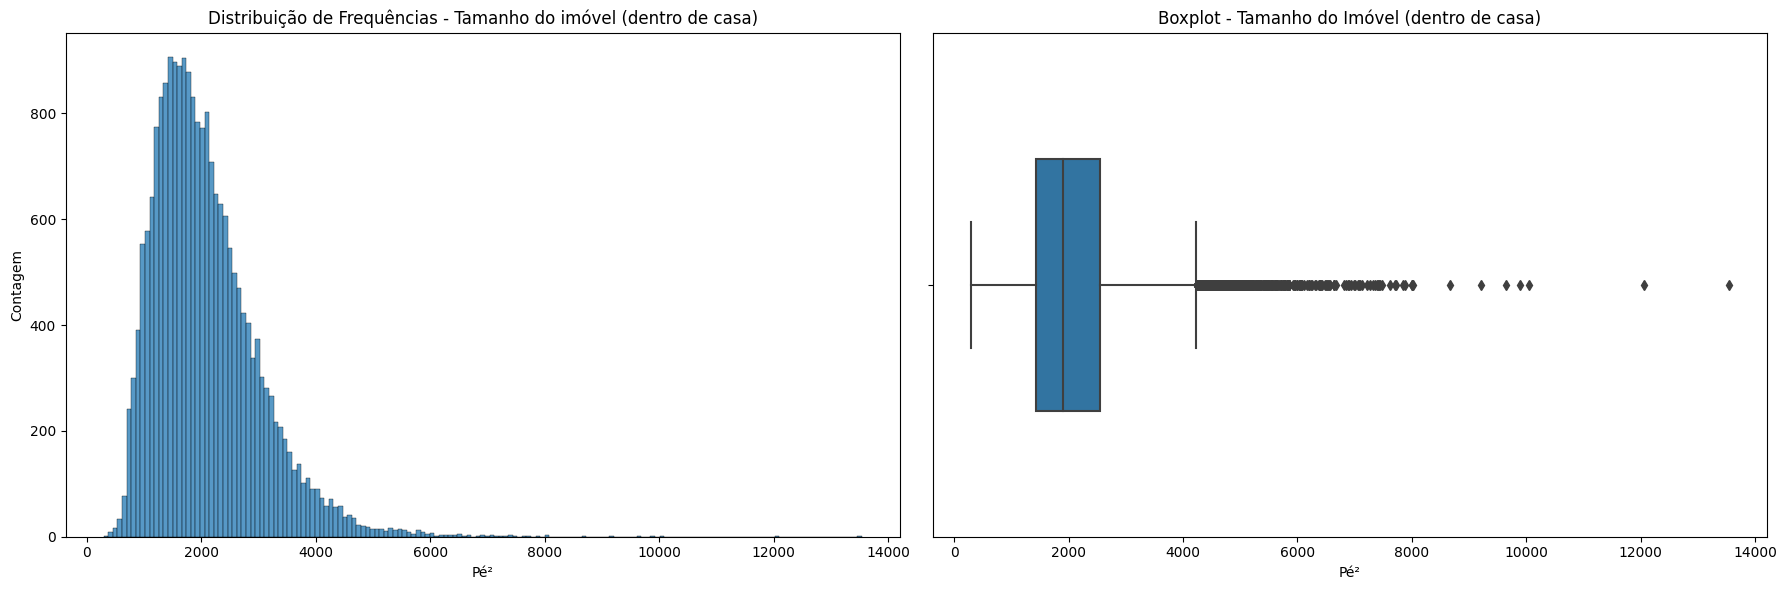

In [ ]:
# Criando uma grade com uma linha e duas colunas
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotando o histograma na primeira coluna
sns.histplot(dataset['sqft_living'], kde=False, ax=axes[0])
axes[0].set_title('Distribuição de Frequências - Tamanho do imóvel (dentro de casa)')
axes[0].set_ylabel('Contagem')
axes[0].set_xlabel('Pé²')

# Plotando o boxplot na segunda coluna
sns.boxplot(x='sqft_living', data=dataset, width=0.5, ax=axes[1])
axes[1].set_title('Boxplot - Tamanho do Imóvel (dentro de casa)')
axes[1].set_xlabel('Pé²')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()


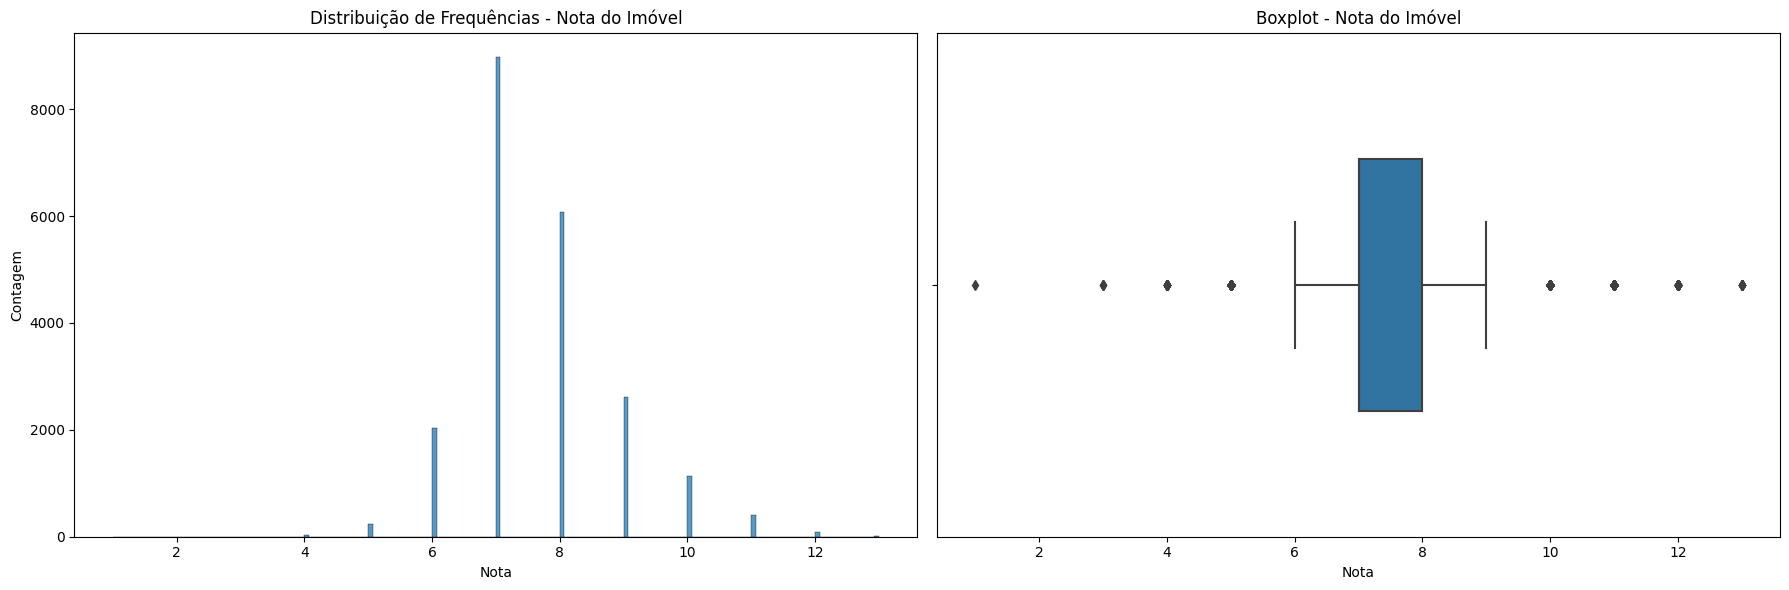

In [ ]:
# Criando uma grade com uma linha e duas colunas
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotando o histograma na primeira coluna
ax1 = sns.histplot(dataset['grade'], kde=False, ax=axes[0])
ax1.set_title('Distribuição de Frequências - Nota do Imóvel')
ax1.set_ylabel('Contagem')
ax1.set_xlabel('Nota')

# Plotando o boxplot na segunda coluna
ax2 = sns.boxplot(x='grade', data=dataset, width=0.5, ax=axes[1])
ax2.set_title('Boxplot - Nota do Imóvel')
ax2.set_xlabel('Nota')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()


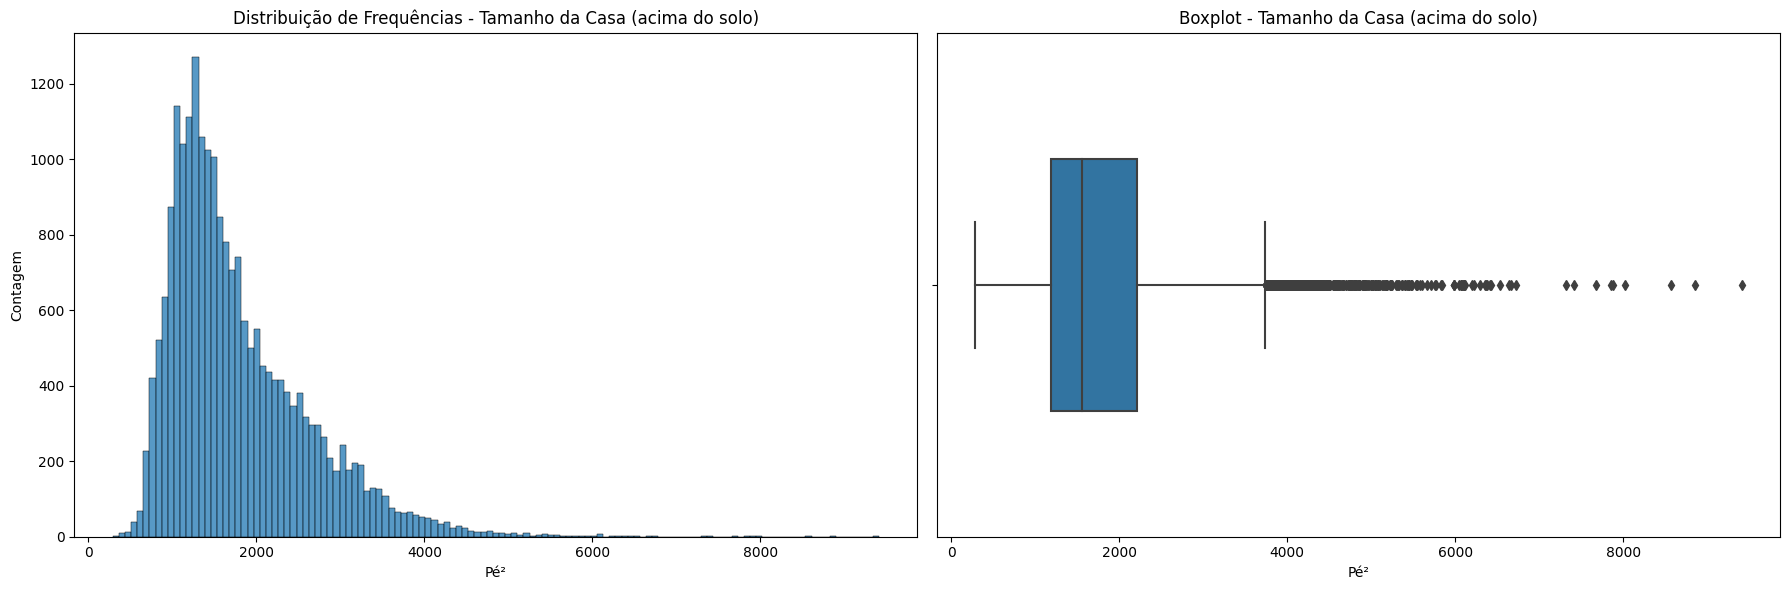

In [ ]:
# Criando uma grade com uma linha e duas colunas
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotando o histograma na primeira coluna
ax1 = sns.histplot(dataset['sqft_above'], kde=False, ax=axes[0])
ax1.set_title('Distribuição de Frequências - Tamanho da Casa (acima do solo)')
ax1.set_ylabel('Contagem')
ax1.set_xlabel('Pé²')

# Plotando o boxplot na segunda coluna
ax2 = sns.boxplot(x='sqft_above', data=dataset, width=0.5, ax=axes[1])
ax2.set_title('Boxplot - Tamanho da Casa (acima do solo)')
ax2.set_xlabel('Pé²')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()


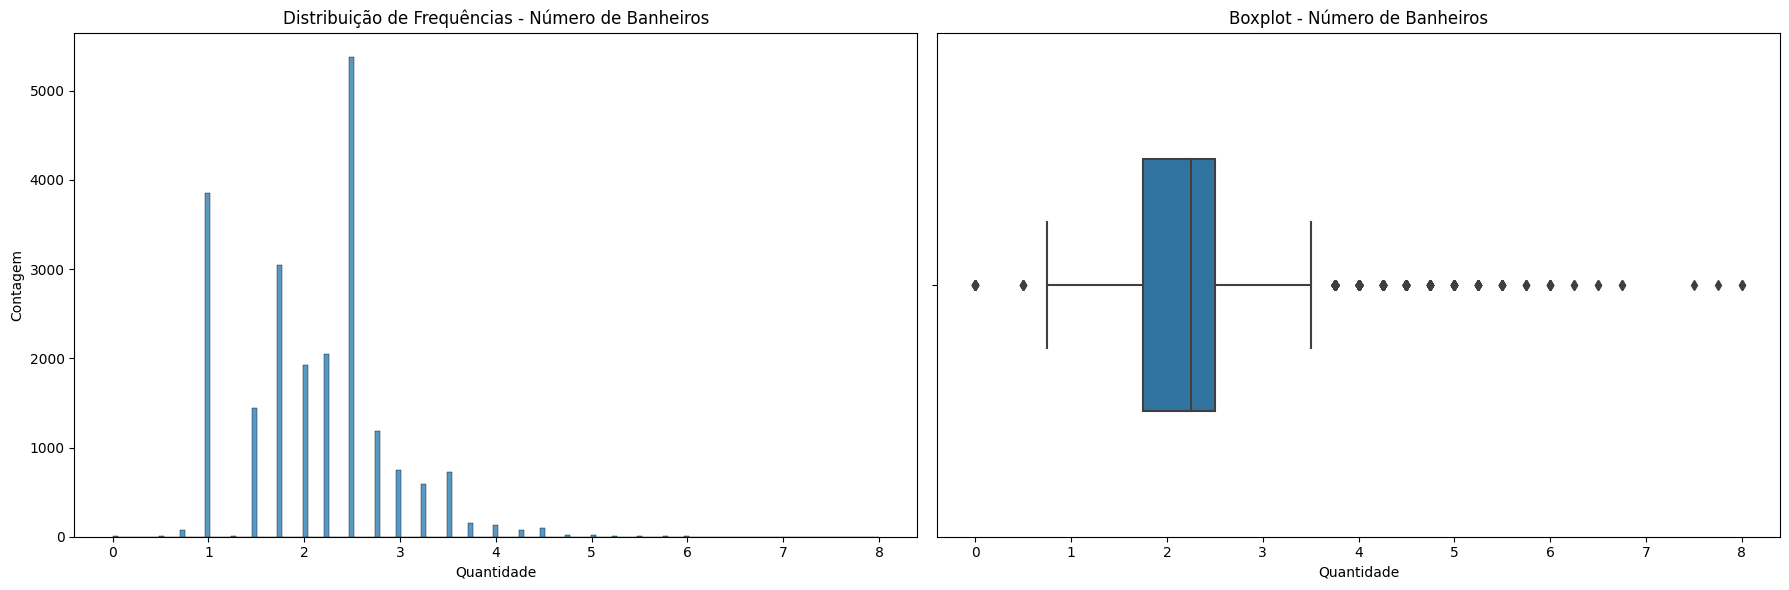

In [ ]:
# Criando uma grade com uma linha e duas colunas
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotando o histograma na primeira coluna
ax1 = sns.histplot(dataset['bathrooms'], kde=False, ax=axes[0])
ax1.set_title('Distribuição de Frequências - Número de Banheiros')
ax1.set_ylabel('Contagem')
ax1.set_xlabel('Quantidade')

# Plotando o boxplot na segunda coluna
ax2 = sns.boxplot(x='bathrooms', data=dataset, width=0.5, ax=axes[1])
ax2.set_title('Boxplot - Número de Banheiros')
ax2.set_xlabel('Quantidade')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()


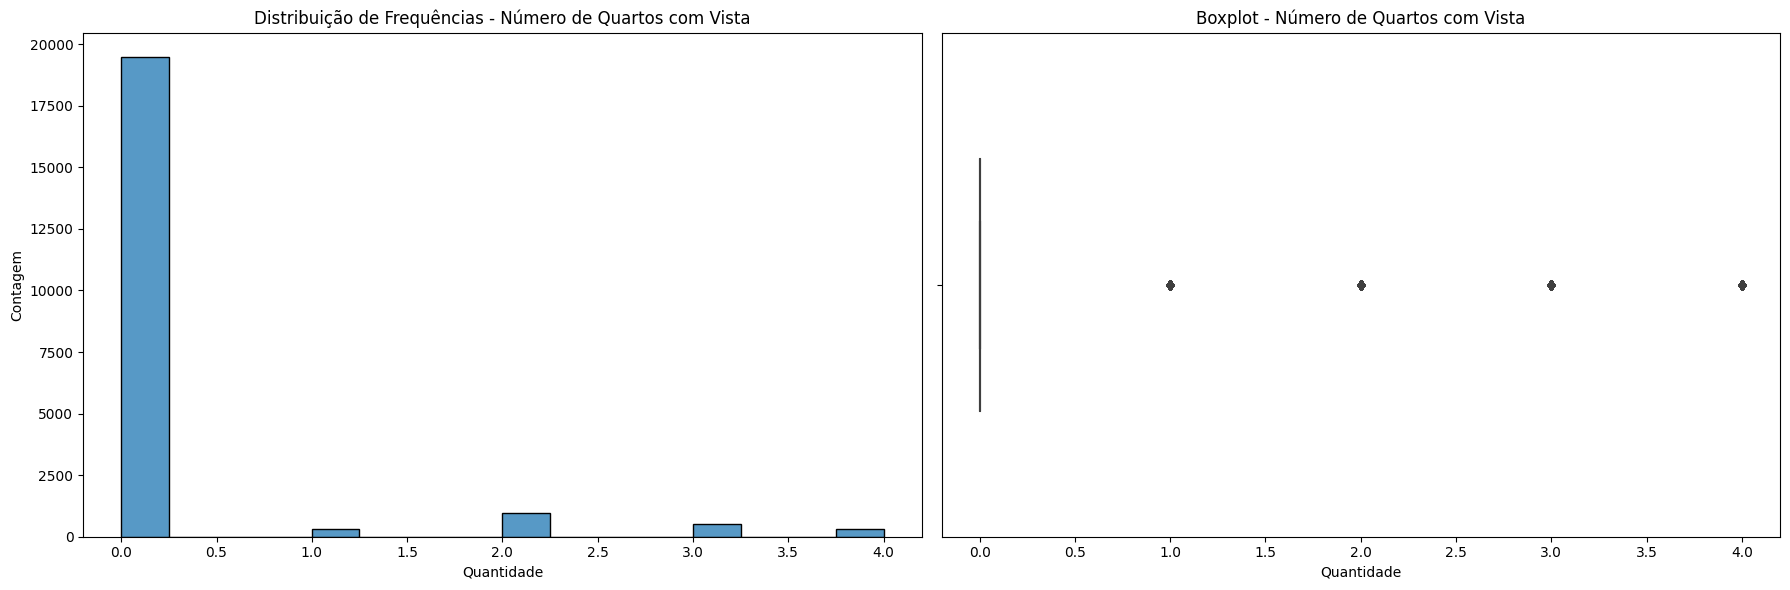

In [ ]:
# Criando uma grade com uma linha e dois colunas
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotando o histograma na primeira coluna
ax1 = sns.histplot(dataset['view'], kde=False, ax=axes[0])
ax1.set_title('Distribuição de Frequências - Número de Quartos com Vista')
ax1.set_ylabel('Contagem')
ax1.set_xlabel('Quantidade')

# Plotando o boxplot na segunda coluna
ax2 = sns.boxplot(x='view', data=dataset, width=0.5, ax=axes[1])
ax2.set_title('Boxplot - Número de Quartos com Vista')
ax2.set_xlabel('Quantidade')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()


### 2.2 plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a variável correlacionada no eixo X

<Axes: title={'center': 'Preço X Tamanho do imóvel (dentro de casa)'}, xlabel='Tamanho do imóvel', ylabel='Preço'>

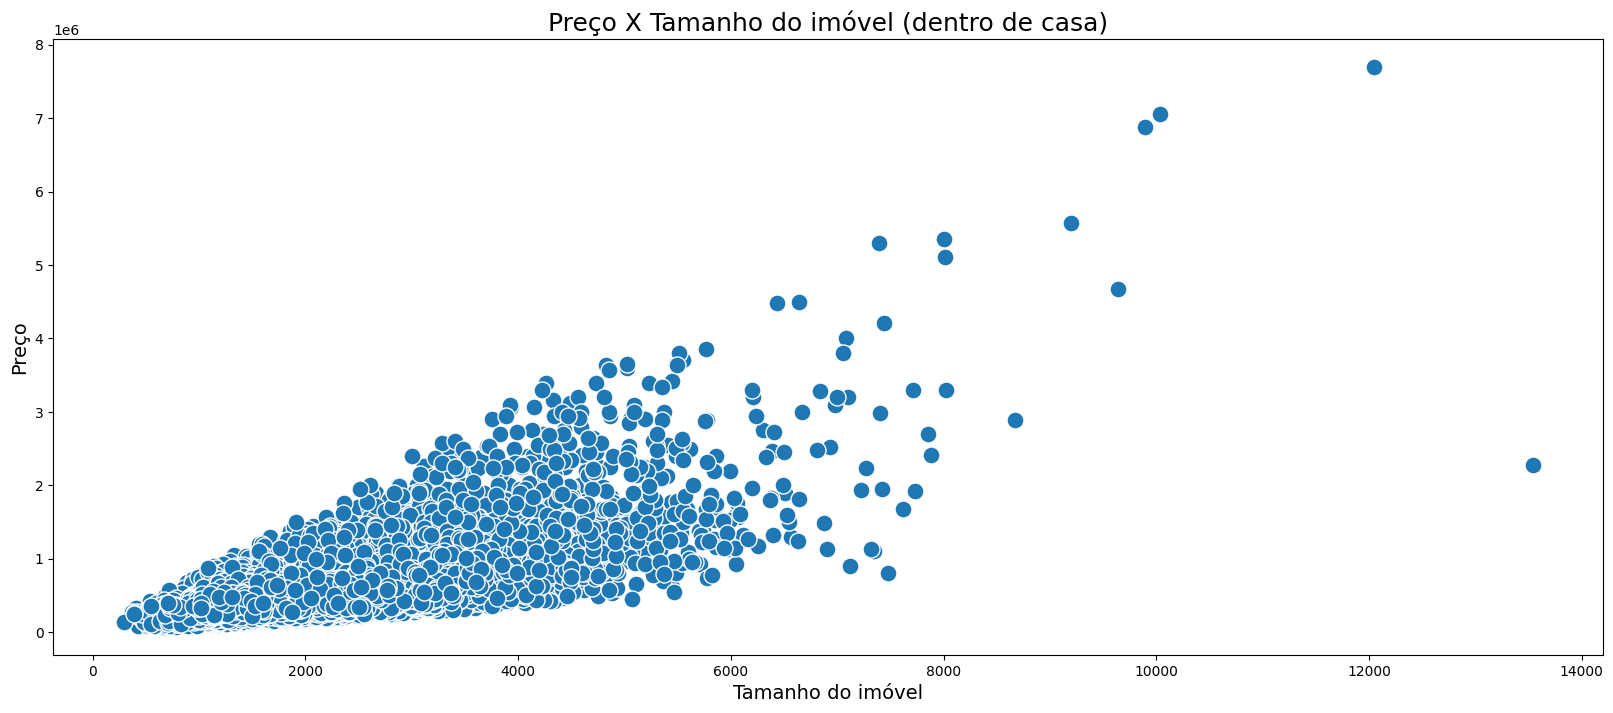

In [ ]:
#plotando dispersão do preço com relação ao tamanho do imóvel
ax = sns.scatterplot(x=dataset['sqft_living'], y=dataset['price'], s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Preço X Tamanho do imóvel (dentro de casa)', fontsize=18)
ax.set_xlabel('Tamanho do imóvel', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
ax

<Axes: title={'center': 'Preço X Nota'}, xlabel='Nota', ylabel='Preço'>

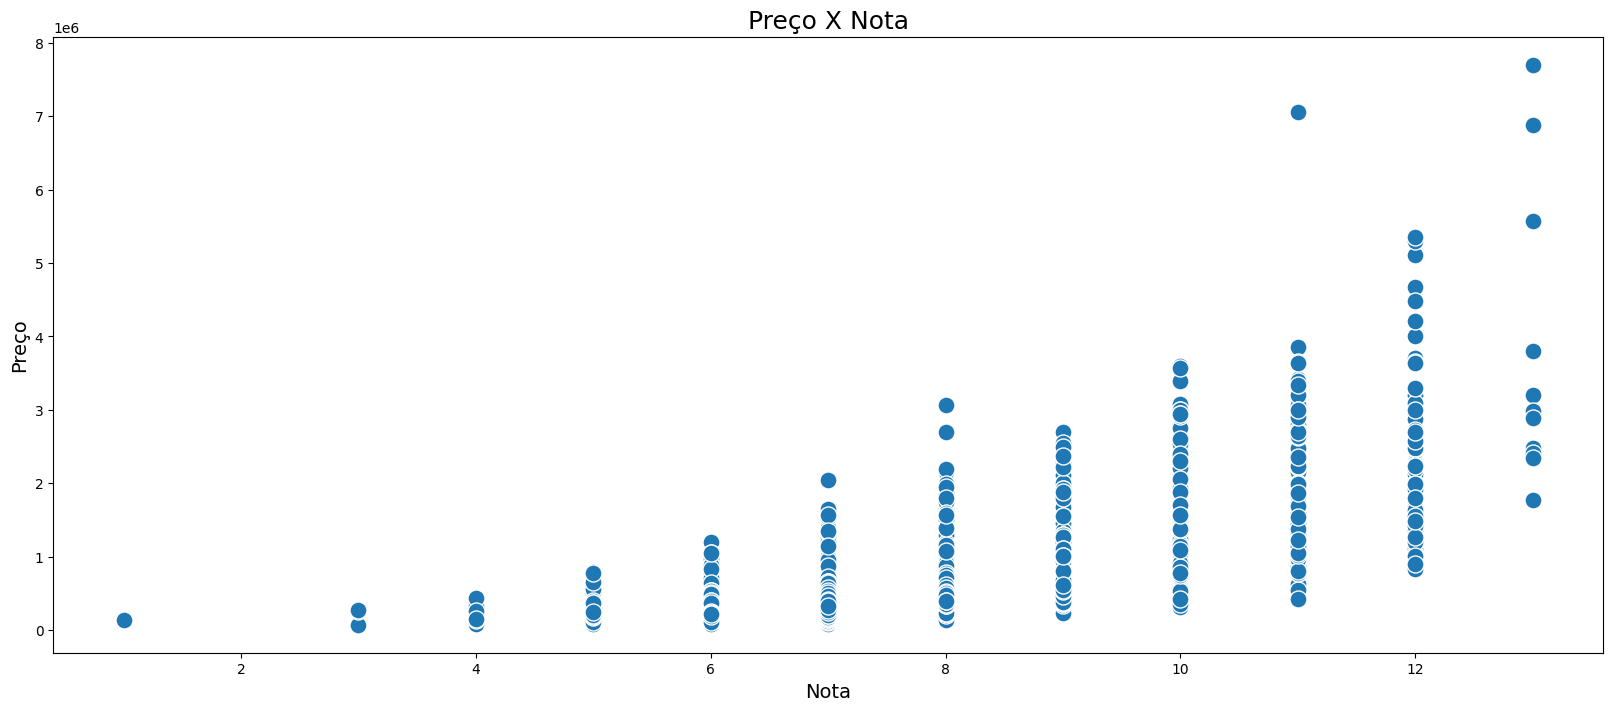

In [ ]:
#plotando dispersão do preço com relação à nota
ax = sns.scatterplot(x=dataset['grade'], y=dataset['price'], s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Preço X Nota', fontsize=18)
ax.set_xlabel('Nota', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
ax

<Axes: title={'center': 'Preço X Tamanho da casa acima do solo'}, xlabel='Tamanho da casa acima do solo', ylabel='Preço'>

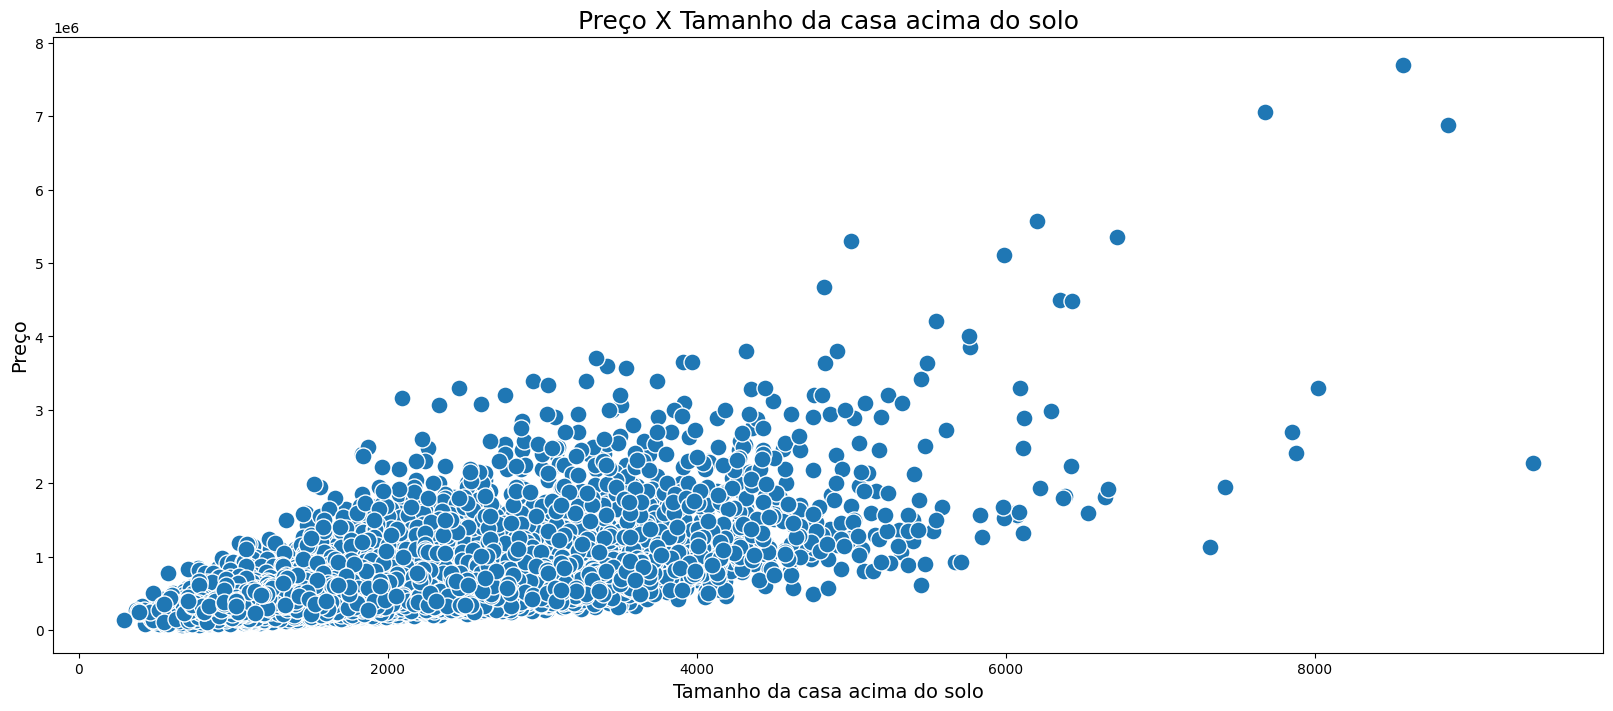

In [ ]:
#plotando dispersão do preço com relação ao tamanho da casa acima do solo
ax = sns.scatterplot(x=dataset['sqft_above'], y=dataset['price'], s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Preço X Tamanho da casa acima do solo', fontsize=18)
ax.set_xlabel('Tamanho da casa acima do solo', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
ax

<Axes: title={'center': 'Preço X Quantidade de banheiros'}, xlabel='Quantidade de banheiros', ylabel='Preço'>

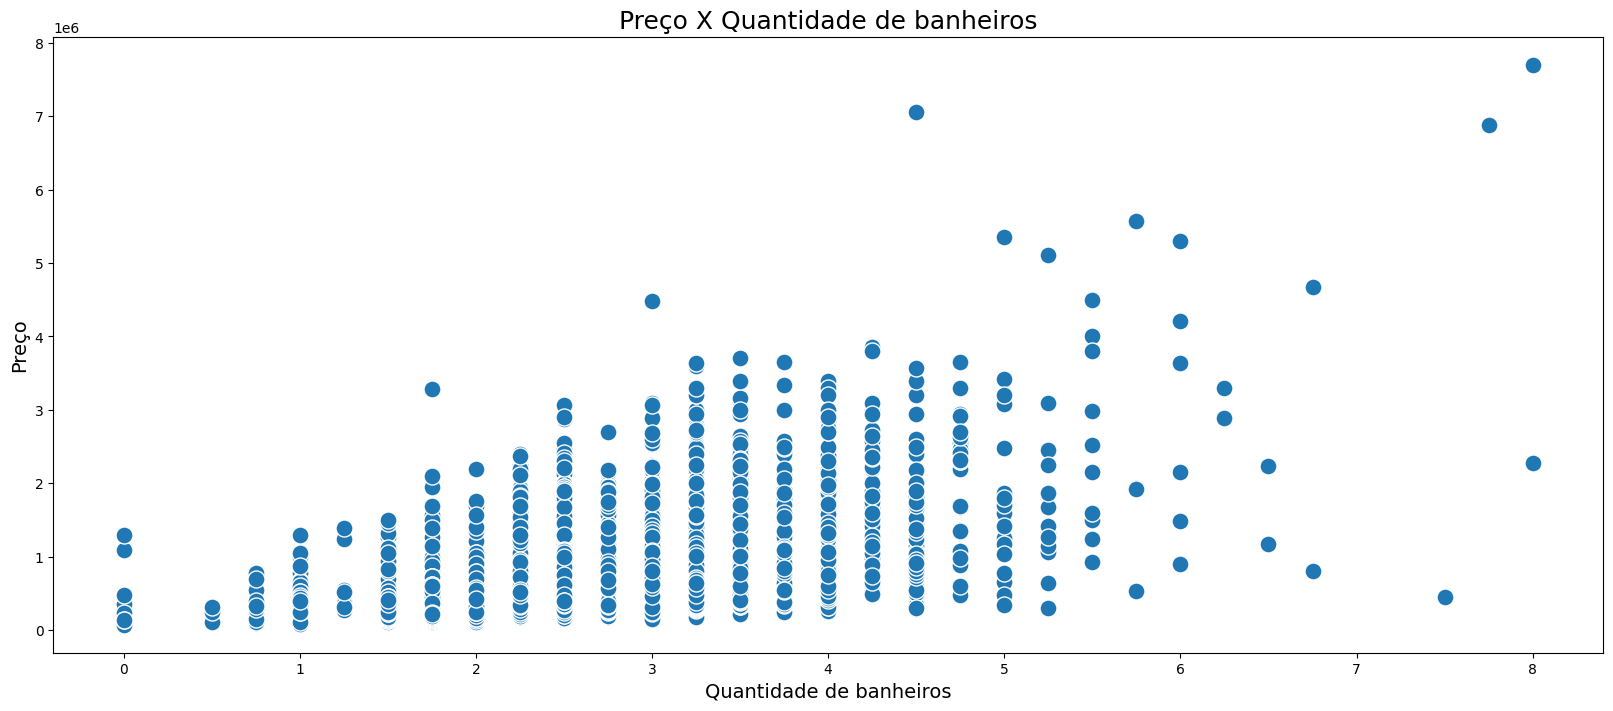

In [ ]:
#plotando dispersão do preço com relação à quantidade de banheiros
ax = sns.scatterplot(x=dataset['bathrooms'], y=dataset['price'], s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Preço X Quantidade de banheiros', fontsize=18)
ax.set_xlabel('Quantidade de banheiros', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
ax

<Axes: title={'center': 'Preço X Quantidade de quartos com vista'}, xlabel='Quantidade de quartos com vista', ylabel='Preço'>

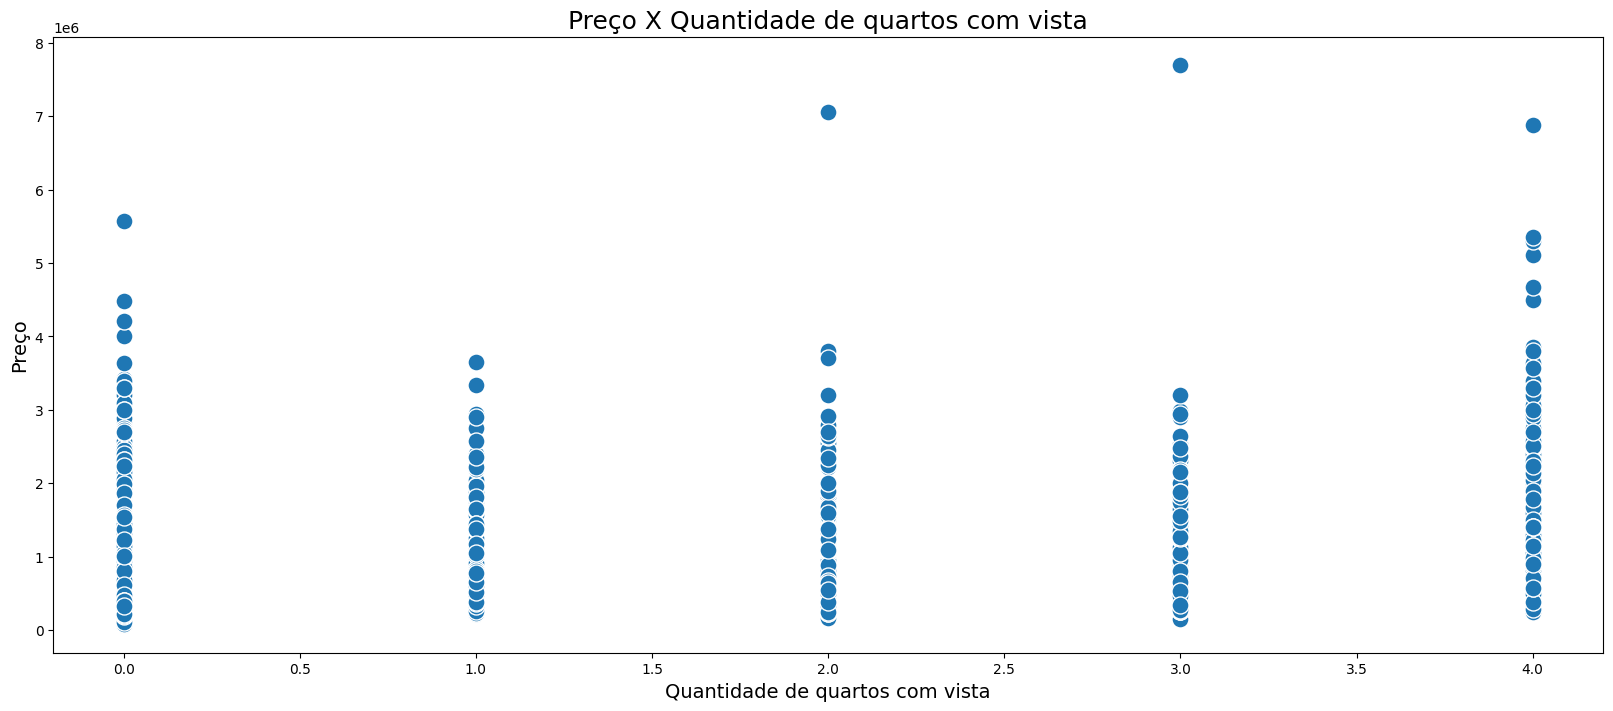

In [ ]:
#plotando dispersão do preço com relação à quantidade de quartos com vista
ax = sns.scatterplot(x=dataset['view'], y=dataset['price'], s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Preço X Quantidade de quartos com vista', fontsize=18)
ax.set_xlabel('Quantidade de quartos com vista', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
ax

### 2.3 para cada uma das 5 variáveis faça uma regressão linear simples sendo preciso a variável resposta (y) e interprete os resultados.

In [ ]:
#regressão linear simples com a variável sqft_living e o preço
Y = correlacao.sqft_living
X = sm.add_constant(correlacao.price)
resultado_regressao1 = sm.OLS(Y, X).fit() #criando os resultados gerais usando o X e o Y
print(resultado_regressao1.summary()) #resultados gerais (testes de hipóteses)

                            OLS Regression Results                            
Dep. Variable:            sqft_living   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     17.96
Date:                Wed, 15 Nov 2023   Prob (F-statistic):            0.00172
Time:                        12:56:54   Log-Likelihood:                 4.2019
No. Observations:                  12   AIC:                            -4.404
Df Residuals:                      10   BIC:                            -3.434
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1730      0.099      1.749      0.1

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#coeficientes da equação 1
beta_1 = resultado_regressao1.params[0]
print("beta_1 =", beta_1.round(4))
beta_2 = resultado_regressao1.params[1]
print("beta_2 =",beta_2.round(4))

beta_1 = 0.173
beta_2 = 0.8338


#### $$\hat{Y}_i = 0,1730 + 0,8338X_i$$

In [ ]:
#r² da equação 1
r2_1 = resultado_regressao1.rsquared.round(2)
print(r2_1)


0.64


In [ ]:
#regressão linear simples com a variável grade e o preço
Y = correlacao.grade
X = sm.add_constant(correlacao.price)
resultado_regressao2 = sm.OLS(Y, X).fit() #criando os resultados gerais usando o X e o Y
print(resultado_regressao2.summary()) #resultados gerais (testes de hipóteses)

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     12.38
Date:                Wed, 15 Nov 2023   Prob (F-statistic):            0.00555
Time:                        12:56:54   Log-Likelihood:                 2.6440
No. Observations:                  12   AIC:                            -1.288
Df Residuals:                      10   BIC:                           -0.3182
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1395      0.113      1.239      0.2

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#coeficientes da equação 2
beta_1 = resultado_regressao2.params[0]
print("beta_1 =", beta_1.round(4))
beta_2 = resultado_regressao2.params[1]
print("beta_2 =",beta_2.round(4))

beta_1 = 0.1395
beta_2 = 0.7884


#### $$\hat{Y}_i = 0,1395 + 0,7884X_i$$

In [ ]:
#r² da equação 2
r2_2 = resultado_regressao2.rsquared.round(2)
print(r2_2)

0.55


In [ ]:
#regressão linear simples com a variável sqft_above e o preço
Y = correlacao.sqft_above
X = sm.add_constant(correlacao.price)
resultado_regressao3 = sm.OLS(Y, X).fit() #criando os resultados gerais usando o X e o Y
print(resultado_regressao3.summary()) #resultados gerais (testes de hipóteses)

                            OLS Regression Results                            
Dep. Variable:             sqft_above   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     6.862
Date:                Wed, 15 Nov 2023   Prob (F-statistic):             0.0256
Time:                        12:56:54   Log-Likelihood:               -0.28894
No. Observations:                  12   AIC:                             4.578
Df Residuals:                      10   BIC:                             5.548
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1568      0.144      1.090      0.3

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#coeficientes da equação 3
beta_1 = resultado_regressao3.params[0]
print("beta_1 =", beta_1.round(4))
beta_2 = resultado_regressao3.params[1]
print("beta_2 =",beta_2.round(4))

beta_1 = 0.1568
beta_2 = 0.7495


#### $$\hat{Y}_i = 0,1568 + 0,7495X_i$$

In [ ]:
#r² da equação 3
r2_3 = resultado_regressao3.rsquared.round(2)
print(r2_3)

0.41


In [ ]:
#regressão linear simples com a variável bathrooms e o preço
Y = correlacao.bathrooms
X = sm.add_constant(correlacao.price)
resultado_regressao4 = sm.OLS(Y, X).fit() #criando os resultados gerais usando o X e o Y
print(resultado_regressao4.summary()) #resultados gerais (testes de hipóteses)

                            OLS Regression Results                            
Dep. Variable:              bathrooms   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     4.713
Date:                Wed, 15 Nov 2023   Prob (F-statistic):             0.0551
Time:                        12:56:54   Log-Likelihood:                0.90706
No. Observations:                  12   AIC:                             2.186
Df Residuals:                      10   BIC:                             3.156
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2433      0.130      1.870      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#coeficientes da equação 4
beta_1 = resultado_regressao4.params[0]
print("beta_1 =", beta_1.round(4))
beta_2 = resultado_regressao4.params[1]
print("beta_2 =",beta_2.round(4))

beta_1 = 0.2433
beta_2 = 0.5622


#### $$\hat{Y}_i = 0,2433 + 0,5622X_i$$

In [ ]:
#r² da equação 4
r2_4 = resultado_regressao4.rsquared.round(2)
print(r2_4)

0.32


In [ ]:
#regressão linear simples com a variável view e o preço
Y = correlacao.view
X = sm.add_constant(correlacao.price)
resultado_regressao5 = sm.OLS(Y, X).fit() #criando os resultados gerais usando o X e o Y
print(resultado_regressao5.summary()) #resultados gerais (testes de hipóteses)

                            OLS Regression Results                            
Dep. Variable:                   view   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.635
Date:                Wed, 15 Nov 2023   Prob (F-statistic):              0.230
Time:                        12:56:54   Log-Likelihood:               0.015946
No. Observations:                  12   AIC:                             3.968
Df Residuals:                      10   BIC:                             4.938
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0830      0.140      0.592      0.5

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#coeficientes da equação 5
beta_1 = resultado_regressao5.params[0]
print("beta_1 =", beta_1.round(4))
beta_2 = resultado_regressao5.params[1]
print("beta_2 =",beta_2.round(4))

beta_1 = 0.083
beta_2 = 0.3566


#### $$\hat{Y}_i = 0,0830 + 0,3566X_i$$

In [ ]:
#r² da equação 5
r2_5 = resultado_regressao5.rsquared.round(2)
print(r2_5)

0.14


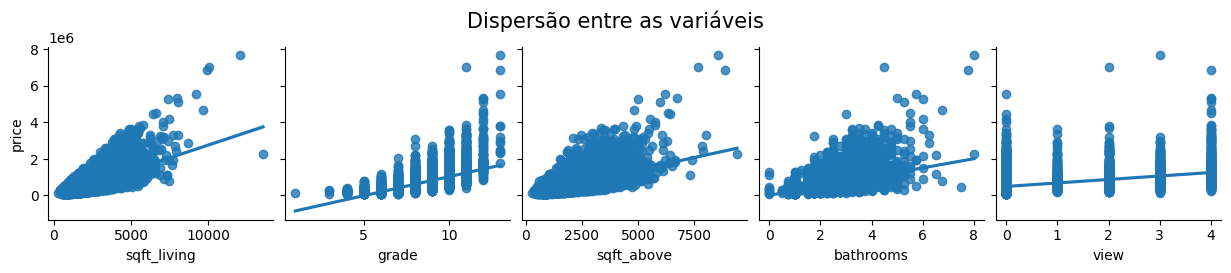

In [ ]:
#plotando dispersão entre as variáveis
ax = sns.pairplot(dataset, y_vars='price', x_vars=['sqft_living', 'grade','sqft_above', 'bathrooms', 'view'], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=15, y=1.05)
ax

In [ ]:
#definindo as linhas e colunas da tabela
variaveis = ['view','bathrooms', 'sqft_above', 'grade','sqft_living']
correlacoes = [0.14,0.32, 0.41, 0.55, 0.70]
tabela = list(zip(variaveis, correlacoes))
df = pd.DataFrame(tabela, columns = ['Variáveis', 'R²'])
df

,Variáveis,R²
0,view,0.14
1,bathrooms,0.32
2,sqft_above,0.41
3,grade,0.55
4,sqft_living,0.70


**Conclusão:** É possível verificar que os dados se ajustaram melhor com relação às variáveis sqft_living>grade>sqft_above>bathroom>view.
Sendo que a variável que ofereceu um modelo que melhor se ajusta aos dados experimentais foi a sqft_living, com R² 0,70